# Imports

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import sqlite3
from google.colab import files
random.seed(22)
np.random.seed(22)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1 - Media Performance Analysis

## Exploratory Data Analysis

In [3]:
# Reading csv
df_media = pd.read_csv("/content/drive/MyDrive/raw_business_data.csv")
df_media

,p_creation_month,region,country,channel,network,sub_channel,os_name,spend,clicks,impressions,installs,signups,new_customers,ltv_projection_3yr
0,2024-01,AFRICA,Kenya,display,google,acquisition,android,24263.887940,274838.962800,2.652986e+07,15164.882870,8911.923062,1523.370997,16.316491
1,2024-01,AFRICA,Kenya,display,google,acquisition,ios,5447.991844,61603.737130,5.770373e+06,1476.723008,1.752351,250.543333,28.599750
2,2024-01,AFRICA,Kenya,display,google,activation,android,1577.835471,26112.184780,2.551433e+06,62.585162,83.408743,89.262570,17.945972
3,2024-01,AFRICA,Kenya,paid_social,facebook,acquisition,android,1582.227765,43540.073170,7.158846e+06,2472.914392,1521.866416,189.181862,10.466852
4,2024-01,AFRICA,Kenya,paid_social,facebook,acquisition,ios,1336.487405,6422.555016,2.589290e+06,195.308975,4.782027,73.328995,22.351497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,2024-12,WE,Spain,paid_social,tiktok,acquisition,android,11560.741430,36380.374740,1.688779e+07,1365.214844,974.707144,340.919963,33.703160
1334,2024-12,WE,Spain,paid_social,tiktok,acquisition,ios,6465.735870,15933.043680,5.703227e+06,461.570680,184.717386,104.183794,86.941623
1335,2024-12,WE,Spain,paid_social,tiktok,activation,android,1833.742816,2426.455886,1.363779e+06,107.651540,70.220303,39.623028,71.387169
1336,2024-12,WE,Spain,sem,adwords,brand_protection,web,49118.413630,119616.041500,2.568573e+05,2.393531,236.707020,851.629329,57.601720


In [4]:
df_media.shape

(1338, 14)

In [5]:
df_media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   p_creation_month    1338 non-null   object 
 1   region              1338 non-null   object 
 2   country             1338 non-null   object 
 3   channel             1338 non-null   object 
 4   network             1338 non-null   object 
 5   sub_channel         1338 non-null   object 
 6   os_name             1336 non-null   object 
 7   spend               1338 non-null   float64
 8   clicks              1338 non-null   float64
 9   impressions         1338 non-null   float64
 10  installs            1338 non-null   float64
 11  signups             1338 non-null   float64
 12  new_customers       1338 non-null   float64
 13  ltv_projection_3yr  1333 non-null   float64
dtypes: float64(7), object(7)
memory usage: 146.5+ KB


In [6]:
# Variable distribution on data type
def EDA_variables (dataframe):
  for column in dataframe.columns:
    if  dataframe[column].dtypes.kind == 'f' or dataframe[column].dtypes.kind== 'i':
      print(dataframe.hist(column))

    elif dataframe[column].dtypes.kind== 'O' or dataframe[column].dtypes.kind== 'b':
      print(dataframe[column].value_counts(normalize=True, dropna=False))

p_creation_month
2024-08    0.088939
2024-10    0.088191
2024-12    0.088191
2024-09    0.087444
2024-11    0.085949
2024-07    0.085202
2024-03    0.080717
2024-02    0.079970
2024-04    0.079970
2024-05    0.079223
2024-06    0.078475
2024-01    0.077728
Name: proportion, dtype: float64
region
AFRICA    0.352765
WE        0.325112
SEE       0.171898
ECA       0.150224
Name: proportion, dtype: float64
country
Poland     0.112108
Spain      0.109865
Morocco    0.105381
Italy      0.103139
Kenya      0.092676
Croatia    0.092676
Ukraine    0.086697
Serbia     0.079223
Tunisia    0.077728
Nigeria    0.076981
Georgia    0.063528
Name: proportion, dtype: float64
channel
paid_social         0.417040
display             0.295217
sem                 0.197309
apple_search_ads    0.090433
Name: proportion, dtype: float64
network
google              0.293722
facebook            0.251868
adwords             0.197309
tiktok              0.115845
apple_search_ads    0.090433
snapchat            0.0

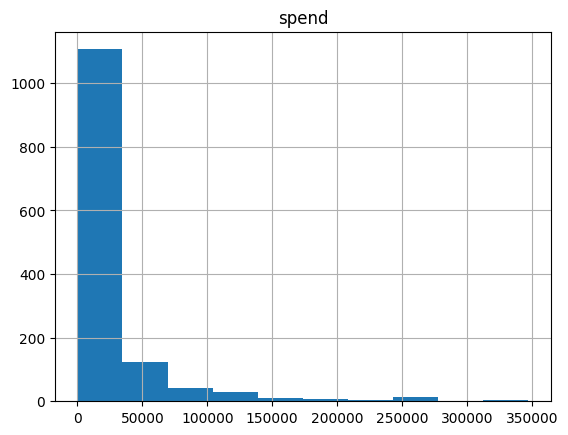

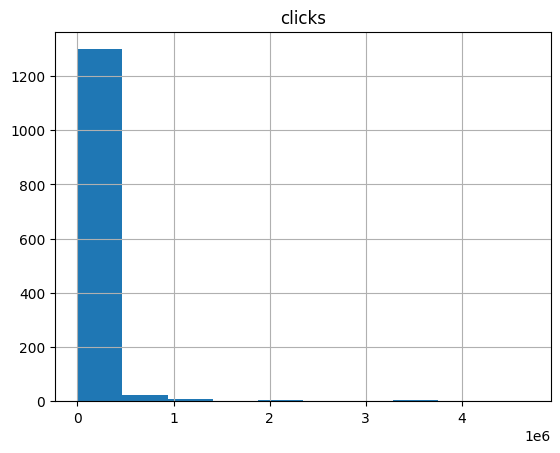

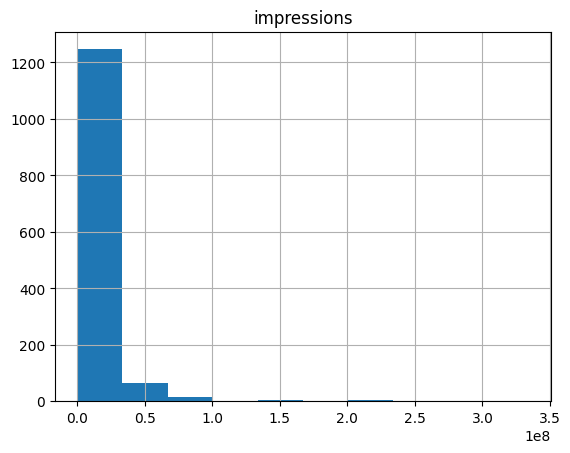

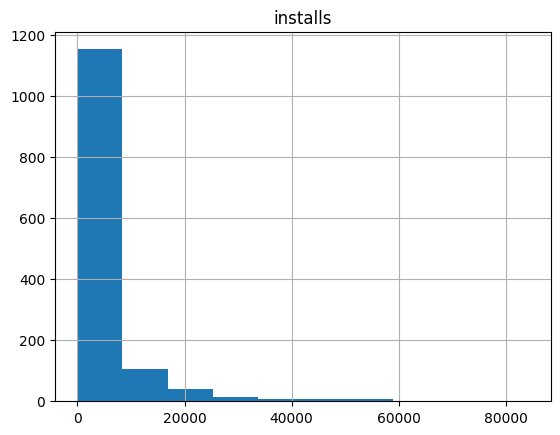

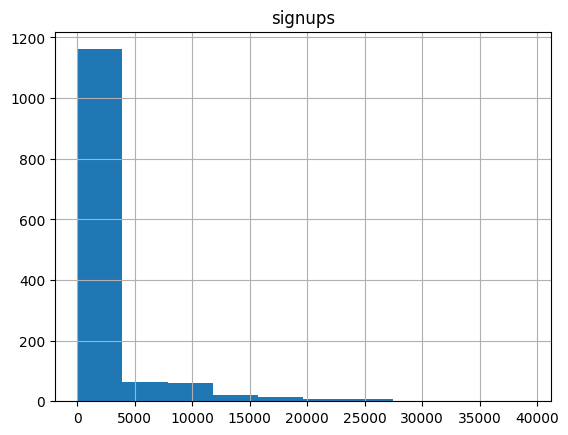

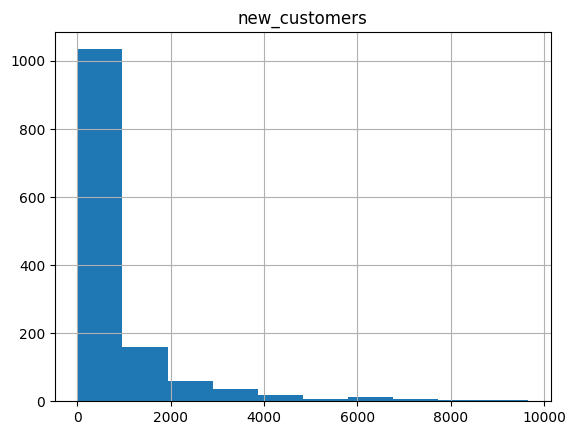

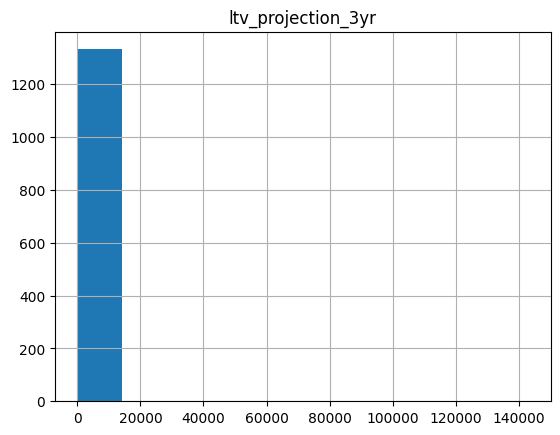

In [7]:
EDA_variables (df_media)

### Data Cleaning: Duplicated, Nulls and Outliers

In [8]:
df_media.duplicated().sum() # No duplicated on data

np.int64(0)

In [9]:
df_media.isnull().sum() # Null values per column

,0
p_creation_month,0
region,0
country,0
channel,0
network,0
sub_channel,0
os_name,2
spend,0
clicks,0
impressions,0


In [10]:
df_media[df_media['os_name'].isnull()] # Nulls for os_name

,p_creation_month,region,country,channel,network,sub_channel,os_name,spend,clicks,impressions,installs,signups,new_customers,ltv_projection_3yr
1209,2024-11,WE,Spain,display,dv360,brand_awareness,NaN,82858.98583,15053.52317,5387481.001,19.029083,0.000000,0.000000,NaN
1327,2024-12,WE,Spain,display,dv360,brand_awareness,NaN,78250.41550,11257.08536,4939606.106,26.496540,0.621123,0.615152,143049.8387


In [11]:
df_media['os_name'] = df_media['os_name'].fillna('unknown')  # As there is no reasonable way to know the operating system, 'unknown' value is assigned

In [12]:
df_media[df_media['ltv_projection_3yr'].isnull()] # Nulls for ltv_projection_3yr

,p_creation_month,region,country,channel,network,sub_channel,os_name,spend,clicks,impressions,installs,signups,new_customers,ltv_projection_3yr
282,2024-03,SEE,Serbia,paid_social,facebook,brand_awareness,all,293.996131,3279.745285,5.328262e+05,0.000000,0.000000,0.0,NaN
709,2024-07,SEE,Serbia,paid_social,snapchat,acquisition,android,345.788025,4767.283290,6.796518e+05,6.585887,3.570903,0.0,NaN
804,2024-08,ECA,Ukraine,paid_social,facebook,activation,android,11.113019,33.712638,9.936673e+03,1.151284,1.174273,0.0,NaN
850,2024-08,WE,Poland,paid_social,snapchat,acquisition,android,53.602491,445.835488,3.798939e+04,3.646846,2.387401,0.0,NaN
1209,2024-11,WE,Spain,display,dv360,brand_awareness,unknown,82858.985830,15053.523170,5.387481e+06,19.029083,0.000000,0.0,NaN


In [13]:
df_media[df_media['new_customers'] == 0]
# In this case we can see that these nulls represent a 0 value, as there was not really a conversion for these ad spends
# It is very important to consider 0 as these campaigns that didn´t convert clients, when calculating aggregations should be considerd as
# Spend for ROAS calculation as with a Null value the calculation would skip the row for calculation

,p_creation_month,region,country,channel,network,sub_channel,os_name,spend,clicks,impressions,installs,signups,new_customers,ltv_projection_3yr
282,2024-03,SEE,Serbia,paid_social,facebook,brand_awareness,all,293.996131,3279.745285,5.328262e+05,0.000000,0.000000,0.0,NaN
709,2024-07,SEE,Serbia,paid_social,snapchat,acquisition,android,345.788025,4767.283290,6.796518e+05,6.585887,3.570903,0.0,NaN
804,2024-08,ECA,Ukraine,paid_social,facebook,activation,android,11.113019,33.712638,9.936673e+03,1.151284,1.174273,0.0,NaN
850,2024-08,WE,Poland,paid_social,snapchat,acquisition,android,53.602491,445.835488,3.798939e+04,3.646846,2.387401,0.0,NaN
1209,2024-11,WE,Spain,display,dv360,brand_awareness,unknown,82858.985830,15053.523170,5.387481e+06,19.029083,0.000000,0.0,NaN


In [14]:
df_media['ltv_projection_3yr'] = df_media['ltv_projection_3yr'].fillna(0)

In [15]:
df_media.isnull().sum()

,0
p_creation_month,0
region,0
country,0
channel,0
network,0
sub_channel,0
os_name,0
spend,0
clicks,0
impressions,0


In [16]:
df_media.describe()
# Visualizing high outlier on max value for ltv_projection_3yr

,spend,clicks,impressions,installs,signups,new_customers,ltv_projection_3yr
count,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000
mean,21728.817223,9.266647e+04,1.024780e+07,3899.911473,1830.871495,744.376290,148.462371
std,43864.417703,3.302151e+05,2.479399e+07,8999.575707,4400.829165,1300.028389,3909.930720
min,11.113019,3.371264e+01,1.334652e+03,0.000000,0.000000,0.000000,0.000000
25%,1503.682402,7.812890e+03,5.423010e+05,17.247063,25.871566,63.850286,22.255321
50%,4460.225780,1.912368e+04,2.328738e+06,329.262652,131.685175,191.703370,34.756923
75%,21550.879698,7.294300e+04,1.026518e+07,2969.436969,912.195832,902.454984,50.013866
max,347179.779600,4.690304e+06,3.339802e+08,84191.783280,39241.212470,9664.535063,143049.838700


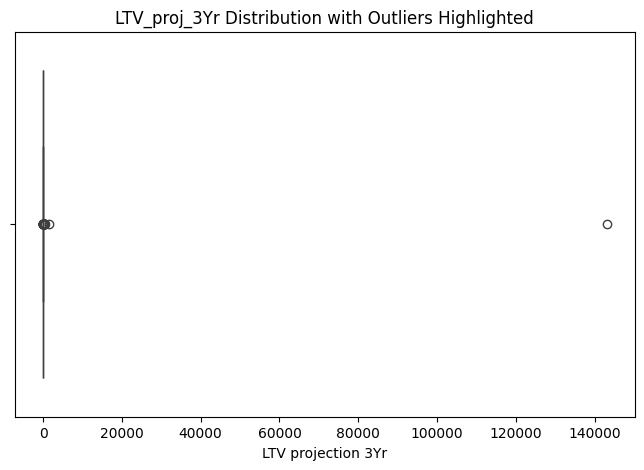

In [17]:
# Visualizing high outlier on max value for ltv_projection_3yr in box plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_media['ltv_projection_3yr'])
plt.title('LTV_proj_3Yr Distribution with Outliers Highlighted')
plt.xlabel('LTV projection 3Yr')
plt.show()

In [18]:
# Outlier Value for LTV projection 3Yr
df_media[df_media['ltv_projection_3yr'] == df_media['ltv_projection_3yr'].max()]

,p_creation_month,region,country,channel,network,sub_channel,os_name,spend,clicks,impressions,installs,signups,new_customers,ltv_projection_3yr
1327,2024-12,WE,Spain,display,dv360,brand_awareness,unknown,78250.4155,11257.08536,4939606.106,26.49654,0.621123,0.615152,143049.8387


In [19]:
# Calculate outlier row
outlier_ltv = df_media['ltv_projection_3yr'].max()
outlier_ltv

143049.8387

In [20]:
# Calculate median LTV for Spain on display excluding the outlier value
median_ltv = df_media.loc[
    (df_media['country'] == 'Spain') &
    (df_media['channel'] == 'display') &
    (df_media['p_creation_month'] != '2024-12'),
    'ltv_projection_3yr'
].median()
median_ltv

51.87198354

In [21]:
# Replacing the outlier ltv_projection_3Yr value with the median for the country/channel for the past periods
df_media.loc[df_media['ltv_projection_3yr'] == df_media['ltv_projection_3yr'].max(), 'ltv_projection_3yr'] = median_ltv

In [22]:
df_media.describe()

,spend,clicks,impressions,installs,signups,new_customers,ltv_projection_3yr
count,1338.000000,1.338000e+03,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000
mean,21728.817223,9.266647e+04,1.024780e+07,3899.911473,1830.871495,744.376290,41.587956
std,43864.417703,3.302151e+05,2.479399e+07,8999.575707,4400.829165,1300.028389,50.342910
min,11.113019,3.371264e+01,1.334652e+03,0.000000,0.000000,0.000000,0.000000
25%,1503.682402,7.812890e+03,5.423010e+05,17.247063,25.871566,63.850286,22.255321
50%,4460.225780,1.912368e+04,2.328738e+06,329.262652,131.685175,191.703370,34.756923
75%,21550.879698,7.294300e+04,1.026518e+07,2969.436969,912.195832,902.454984,50.013866
max,347179.779600,4.690304e+06,3.339802e+08,84191.783280,39241.212470,9664.535063,1515.360119


In [23]:
# Exporting data with no nulls and normalized outlier to csv
df_media.to_csv('clean_business_data.csv', index=False)
files.download('clean_business_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task 2 - Media Performance Data Aggregation with SQL

## Preparation for Dummies Creation

In [24]:
# Helper function to generate random dates
def random_dates(start, end, n):
    start_u = start.value // 10**9
    end_u = end.value // 10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

In [25]:
# Date range for campaigns and conversions
start_date = pd.to_datetime("2024-01-01")
end_date = pd.to_datetime("2024-06-30")

In [26]:
# 1. campaign_performance
campaign_ids = range(1, 11)  # 10 campaigns
regions = ["Europe", "Asia", "America"]
countries = {
    "Europe": ["Spain", "France", "Germany"],
    "Asia": ["Japan", "India", "China"],
    "America": ["Bolivia", "Brazil", "Mexico"]
}

campaign_perf_rows = []
for _ in range(1200):
    region = random.choice(regions)
    country = random.choice(countries[region])
    campaign_id = random.choice(campaign_ids)
    date = random_dates(start_date, end_date, 1)[0]
    clicks = random.randint(50, 500)
    installs = int(clicks * random.uniform(0.1, 0.5))
    spend = round(clicks * random.uniform(0.2, 0.8), 2)
    campaign_perf_rows.append([date, region, country, campaign_id, clicks, installs, spend])

campaign_performance = pd.DataFrame(campaign_perf_rows, columns=[
    "date", "region", "country", "campaign_id", "clicks", "installs", "spend"
])
campaign_performance

,date,region,country,campaign_id,clicks,installs,spend
0,2024-03-12 01:12:21,Europe,Spain,1,363,181,112.73
1,2024-05-16 09:59:32,Europe,Germany,6,455,207,154.27
2,2024-03-01 06:20:28,Europe,France,10,141,66,86.17
3,2024-01-02 21:12:32,Asia,China,1,345,156,191.04
4,2024-05-07 17:16:20,Asia,India,4,142,62,78.06
...,...,...,...,...,...,...,...
1195,2024-01-05 06:37:28,Asia,China,10,485,102,142.29
1196,2024-06-02 04:07:11,America,Bolivia,2,224,51,129.02
1197,2024-04-23 08:50:06,Europe,France,4,193,52,80.20
1198,2024-05-19 17:01:47,America,Brazil,7,459,198,254.84


In [27]:
# 2. conversions
user_ids = range(1, 51)  # 50 unique users
conversion_rows = []
for _ in range(700):
    user_id = random.choice(user_ids)
    campaign_id = random.choice(campaign_ids)
    date = random_dates(start_date, end_date, 1)[0]
    conversion_rows.append([user_id, campaign_id, date])

conversions = pd.DataFrame(conversion_rows, columns=["user_id", "campaign_id", "date"])
conversions

,user_id,campaign_id,date
0,20,1,2024-04-14 17:50:45
1,44,2,2024-01-23 11:44:36
2,24,5,2024-03-13 16:37:41
3,38,3,2024-01-23 06:13:13
4,48,5,2024-05-12 08:56:00
...,...,...,...
695,18,4,2024-02-15 05:06:19
696,35,10,2024-05-05 16:32:37
697,42,8,2024-03-03 02:00:35
698,3,3,2024-05-25 11:41:38


In [28]:
# 3. campaign_metadata
channels = ["Social", "Email", "Search", "Display"]
campaign_metadata_rows = []
for cid in campaign_ids:
    campaign_metadata_rows.append([cid, f"Campaign_{cid}", random.choice(channels)])

campaign_metadata = pd.DataFrame(campaign_metadata_rows, columns=[
    "campaign_id", "campaign_name", "channel"
])
campaign_metadata

,campaign_id,campaign_name,channel
0,1,Campaign_1,Search
1,2,Campaign_2,Email
2,3,Campaign_3,Display
3,4,Campaign_4,Social
4,5,Campaign_5,Search
5,6,Campaign_6,Display
6,7,Campaign_7,Search
7,8,Campaign_8,Social
8,9,Campaign_9,Display
9,10,Campaign_10,Social


In [29]:
# 4. ltv_projections
ltv_rows = []
for month in range(1, 7):  # Jan to June
    for region in regions:
        for country in countries[region]:
            for channel in channels:
                avg_ltv = round(random.uniform(20, 100), 2)
                ltv_rows.append([month, country, channel, avg_ltv])

ltv_projections = pd.DataFrame(ltv_rows, columns=[
    "month", "country", "channel", "average_ltv_per_customer"
])
ltv_projections

,month,country,channel,average_ltv_per_customer
0,1,Spain,Social,71.93
1,1,Spain,Email,48.34
2,1,Spain,Search,55.58
3,1,Spain,Display,72.26
4,1,France,Social,88.18
...,...,...,...,...
211,6,Brazil,Display,22.13
212,6,Mexico,Social,96.57
213,6,Mexico,Email,64.94
214,6,Mexico,Search,57.46


## Testing SQL Final Query

In [30]:
# Setting up SQLite3 connection and saving generated DFs as tables
conn = sqlite3.connect(":memory:")
campaign_performance.to_sql("campaign_performance", conn, index=False, if_exists="replace")
conversions.to_sql("conversions", conn, index=False, if_exists="replace")
campaign_metadata.to_sql("campaign_metadata", conn, index=False, if_exists="replace")
ltv_projections.to_sql("ltv_projections", conn, index=False, if_exists="replace")

216

In [31]:
# Executing CTE
sql_query = """
WITH
-- 1 Prepare campaign activity data (monthly aggregated)
campaign_base AS (
    SELECT
        DATE(strftime('%Y-%m-01', date)) AS month_start,
        strftime('%Y-%m', date) AS month,
        region,
        country,
        campaign_id,
        SUM(spend) AS spend,
        SUM(clicks) AS clicks,
        SUM(installs) AS installs
    FROM campaign_performance
    GROUP BY month_start, month, region, country, campaign_id
),

-- 2 Identify each user's FIRST conversion date
first_orders AS (
    SELECT
        user_id,
        MIN(date) AS first_order_date
    FROM conversions
    GROUP BY user_id
),

-- 3 Link first conversions back to campaigns
acquired_users AS (
    SELECT
        fo.user_id,
        fo.first_order_date,
        c.campaign_id
    FROM first_orders fo
    JOIN conversions c
      ON fo.user_id = c.user_id
     AND fo.first_order_date = c.date
),

-- 4 Tag first conversions with month, region, country, channel
acquisition_details AS (
    SELECT
        strftime('%Y-%m', cb.month_start) AS month,
        cb.region,
        cb.country,
        cm.channel,
        au.user_id,
        au.first_order_date
    FROM acquired_users au
    JOIN campaign_base cb
      ON au.campaign_id = cb.campaign_id
     AND strftime('%Y-%m', au.first_order_date) = cb.month
    JOIN campaign_metadata cm
      ON au.campaign_id = cm.campaign_id
),

-- 5 Calculate m+1 retention
retention_m1 AS (
    SELECT
        ad.month,
        ad.region,
        ad.country,
        ad.channel,
        COUNT(DISTINCT r.user_id) AS m1_retained_users
    FROM acquisition_details ad
    JOIN conversions r
      ON ad.user_id = r.user_id
     AND strftime('%Y-%m', r.date) = strftime('%Y-%m', DATE(ad.first_order_date, '+1 month'))
    GROUP BY ad.month, ad.region, ad.country, ad.channel
),

-- 6 Aggregate conversions
agg_conversions AS (
    SELECT
        month,
        region,
        country,
        channel,
        COUNT(DISTINCT user_id) AS conversions
    FROM acquisition_details
    GROUP BY month, region, country, channel
),

-- 7 Aggregate campaign metrics
agg_campaigns AS (
    SELECT
        cb.month,
        cb.region,
        cb.country,
        cm.channel,
        SUM(cb.spend) AS spend,
        SUM(cb.clicks) AS clicks,
        SUM(cb.installs) AS installs
    FROM campaign_base cb
    JOIN campaign_metadata cm
      ON cb.campaign_id = cm.campaign_id
    GROUP BY cb.month, cb.region, cb.country, cm.channel
),

-- 8 Join LTV projections
ltv_joined AS (
    SELECT
        ac.month,
        ac.region,
        ac.country,
        ac.channel,
        ac.spend,
        ac.clicks,
        ac.installs,
        COALESCE(l.average_ltv_per_customer, 0) AS average_ltv_per_customer
    FROM agg_campaigns ac
    LEFT JOIN ltv_projections l
      ON l.month = CAST(substr(ac.month, 6, 2) AS INT)
     AND l.country = ac.country
     AND l.channel = ac.channel
)

-- 9 Final output
SELECT
    l.month,
    l.region,
    l.country,
    l.channel,
    l.spend,
    l.clicks,
    l.installs,
    c.conversions,
    CASE WHEN c.conversions > 0 THEN ROUND(l.spend / c.conversions, 2) ELSE NULL END AS cac,
    l.average_ltv_per_customer,
    CASE WHEN c.conversions > 0 THEN ROUND(l.average_ltv_per_customer / (l.spend / c.conversions), 2) ELSE NULL END AS ltv_cac,
    COALESCE(r.m1_retained_users, 0) AS m1_retention
FROM ltv_joined l
LEFT JOIN agg_conversions c
  ON l.month = c.month
 AND l.region = c.region
 AND l.country = c.country
 AND l.channel = c.channel
LEFT JOIN retention_m1 r
  ON l.month = r.month
 AND l.region = r.region
 AND l.country = r.country
 AND l.channel = r.channel
ORDER BY l.month, l.region, l.country, l.channel;
"""


In [32]:
# Testing Final Query
final_query = pd.read_sql_query(sql_query, conn)
final_query

,month,region,country,channel,spend,clicks,installs,conversions,cac,average_ltv_per_customer,ltv_cac,m1_retention
0,2024-01,America,Bolivia,Display,1065.64,1816,512,14.0,76.12,42.76,0.56,12
1,2024-01,America,Bolivia,Email,334.11,1178,296,4.0,83.53,41.37,0.50,4
2,2024-01,America,Bolivia,Search,346.85,691,191,5.0,69.37,22.10,0.32,5
3,2024-01,America,Bolivia,Social,459.49,1319,395,10.0,45.95,65.68,1.43,10
4,2024-01,America,Brazil,Display,861.91,1778,498,14.0,61.57,98.96,1.61,12
...,...,...,...,...,...,...,...,...,...,...,...,...
208,2024-06,Europe,Germany,Social,729.63,1290,417,NaN,NaN,35.61,NaN,0
209,2024-06,Europe,Spain,Display,660.36,1674,503,NaN,NaN,81.15,NaN,0
210,2024-06,Europe,Spain,Email,475.74,1112,406,NaN,NaN,90.49,NaN,0
211,2024-06,Europe,Spain,Search,1815.99,3159,883,NaN,NaN,50.95,NaN,0
